# T2

## Matías Zúñiga S.

In [10]:
# se importan librerías
import numpy as np
import matplotlib.pyplot as plt
import camb
from scipy.integrate import solve_ivp
from scipy.misc import derivative
import scienceplots
from sympy import *
import seaborn as sns

# P4

Númericamente, se quiere resolver las ecuaciones de perturbación para la componente de materia con $w = \delta p= \sigma = 0$, donde $w$ viene de la ecuación de estado , $\delta p$, es de la perturbación de la presión y $\sigma$ es el estrés anisótropico. Se asume el modelo $\Lambda CDM$ con $\Omega_{r_0} = 10^{-4}$ y $\Omega_{m_0} = 0.3$. Luego, se quiere plotear los resultados para $10^{-4} \leq a \leq 1$ y para cuatro diferentes escalas $k = H_0$, $k = 5H_0$, $k = 20H_0$ y $k = 200 H_0$, esto con $H_0 = 67 Km/(sMpc)$.

Se tiene el siguiente set de ecuaciones a resolver (resolución en el pdf de la tarea):

$$
\begin{align}
\delta_m^´ & = 3 \phi^´ - \frac{\theta_m}{a^2H} \\
\theta_m^´ & = -\frac{\theta_m}{a} + \frac{k^2 \phi}{a^2H} \\
\delta_{\Lambda}^´ & = 0 \\
k^2\phi & = -\frac{3a^2H^2}{2} \left[ \Omega_m \left( \delta_m + \frac{3aH \theta_m}{k^2}\right) + \delta_{\Lambda}\Omega_{\Lambda} \right] \\
H & = H_0 \sqrt{\Omega_m a^{-3} + \Omega_{\Lambda}}
\end{align}
$$

donde las derivadas son con respecto al factor de escala $a$. Juntando las ecuaciones, se obtiene la siguiente expresión para $\delta_m$ y $\theta_m$:

$$
\begin{align}
\delta_m^´ & = -\frac{1}{2k^2 + 9a^2H^2 \Omega_m} \left( \frac{27a^3H^3 \theta_m^´}{2k^2} + \frac{2k^2\theta_m}{a^2H}\right)
\\
\theta_m^´ & = -\frac{\theta_m}{a} + \frac{k^2 \phi}{a^2H} 
\end{align}
$$



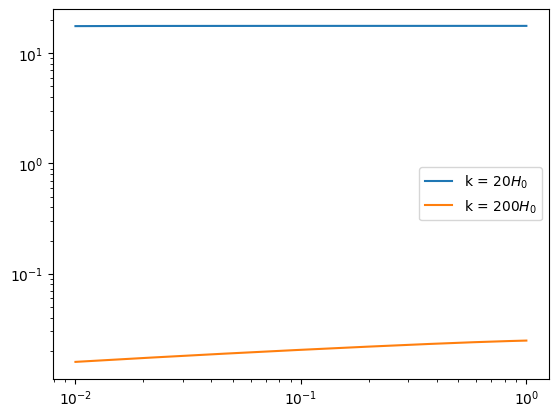

In [18]:
# constantes 
H_0 = 67
O_m = 0.3
O_lambda = 0.7
delta_lambda = 10**(-3)

# array de a
a = np.linspace(10**(-2), 1, 1000)

# función para calcular distintos k
def k(factor):
    return factor*H_0

# se define el set de ecuaciones diferenciales a resolver 
def sist(a, p, k):
    delta_m, theta_m= p
    
    # hubble, potencial y cosas
    H = H_0*np.sqrt(O_m*(a**(-3)) + O_lambda)
    d = (1)/(2*(k**2) + 9*(a**2)*(H**2)*O_m)

    # las cosas a resolver
    delta_m_prima = d*((27*(a**2)*(H**3)*O_m*theta_m)/(k**2) +(81*(a**3)*(H**4)*(O_m**2)*delta_m)/(2*(k**2)) +(243*(a**4)*(H**5)*(O_m**2)*theta_m)/(2*(k**4)) + (2*(a**3)*(H**4)*O_m*O_lambda*delta_lambda)/(2*(k**2))-(2*(k**2)*theta_m)/((a**2)*H))
    theta_m_prima = -(3/2)* H * (O_m*(delta_m * (3*a*H*theta_m)/(k**2)) +delta_lambda*O_lambda)- (theta_m)/(a)

    return [delta_m_prima, theta_m_prima]

# condiciones iniciales
delta_i = 0.01
theta_i = 0.01
#= solve_ivp(sist, (10**(-4), 1), [delta_i, theta_i], args=(k(1),),method='RK45',  t_eval=a)
#k5= solve_ivp(sist, (10**(-4), 1), [delta_i, theta_i], args=(k(5),),method='DOP853', t_eval=a)
k20= solve_ivp(sist, (10**(-4), 1), [delta_i, theta_i], args=(k(20),),method='DOP853', t_eval=a)
k200= solve_ivp(sist, (10**(-4), 1), [delta_i, theta_i], args=(k(200),),method='DOP853', t_eval=a)

#plt.plot(k1.t, k1.y[0], label = r'k = $H_0$')
#plt.loglog(k5.t, k5.y[0], label = r'k = 5$H_0$')
plt.loglog(k20.t, k20.y[0], label = r'k = 20$H_0$')
plt.plot(k200.t, k200.y[0], label = r'k = 200$H_0$')
plt.legend()

## P5

Usando `CAMB`, calcule el espectro de potencia de la materia a diferentes redshift. A continuación, ajuste manualmente la densidad de neutrinos masivos a cero. Comentar las diferencias y justificar los resultados.

In [19]:
# constantes cosmológicas a ocupar
H0 = 67.4 
omega_m = 0.315
omega_ch2 = 0.120
omega_bh2 = 0.0224
tau = 0.054
omnuh2 = 0

# se crean parámetros
pars1 = camb.CAMBparams()
pars1.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau)

class: <CAMBparams>
 WantCls = True
 WantTransfer = False
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 0.9
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2500
 max_l_tensor = 600
 max_eta_k = 5000.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.0224
 omch2 = 0.12
 omk = 0.0
 omnuh2 = 0.000644866570625114
 H0 = 67.4
 TCMB = 2.7255
 YHe = 0.24586829360147697
 num_nu_massless = 2.0293333333333337
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = False
 nu_mass_degeneracies = [1.0146666666666666]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpivot
   ns = 0.96
   nrun = 

Primero se calcula para el caso en que la densidad de neutrinos es no nula

In [20]:
# forma bonita de crear arreglo de redshift
redshifts = np.arange(0, 10000, 10000//5)

# se crea el matter power spectra con los parámetros cosmológicos 
pars1.set_matter_power(redshifts, kmax=1)
results = camb.get_results(pars1)

# número de onda kh, redshift z y valor de matter power spectra PK dado kh y z 
kh, z, PK = results.get_linear_matter_power_spectrum(hubble_units=True,
                                                     k_hunit=True)

Note: redshifts have been re-sorted (earliest first)


Text(0.5, 0.98, 'Especto de potencias de materia considerando neutrinos masivos')

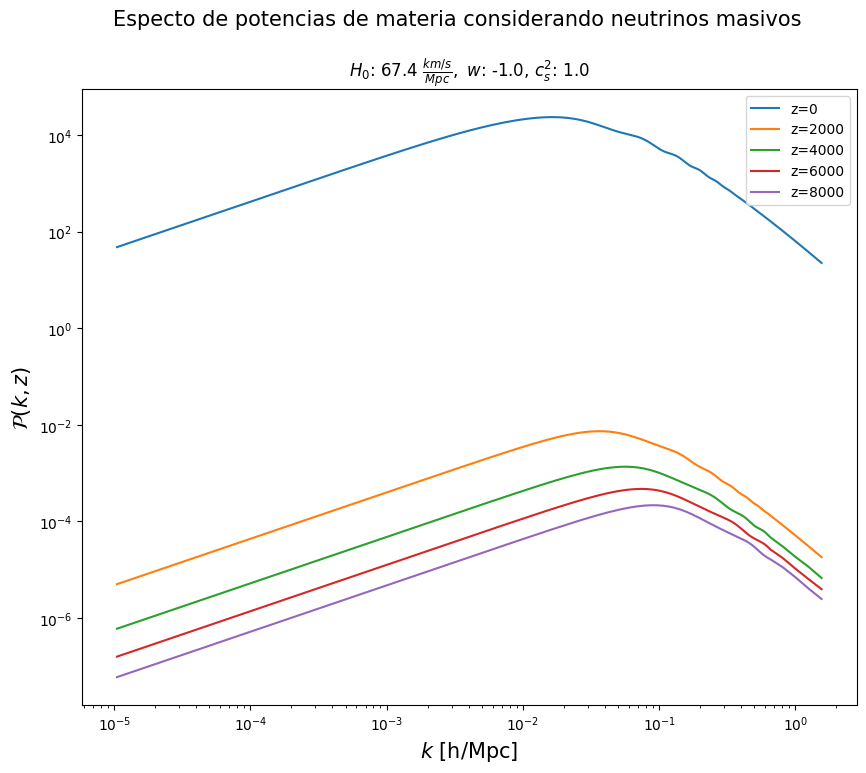

In [21]:
# se hace el plot para distintos redshift
fig, ax = plt.subplots(figsize=(10, 8))

for iz, redshift in enumerate(redshifts):
    ax.loglog(kh, PK[iz, :], label=f"z={redshift}")


plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
ax.set_ylabel(r"$\mathcal{P}(k, z)$", fontsize=15)
ax.set_xlabel(r"$k$ [h/Mpc]", fontsize=15)
ax.set_title(f"$H_0$: {pars1.H0} $\\frac{{km/s}}{{Mpc}}, $" + 
                f" $w$: {pars1.DarkEnergy.w}, $c_s^2$: {pars1.DarkEnergy.cs2}")

fig.suptitle("Especto de potencias de materia considerando neutrinos masivos", fontsize=15)

Ahora se setea que la densidad de neutrinos masivos sea nula.

In [22]:
# se crean parámetros tal que la densidad de neutrinos masivos sea 0
pars2 = camb.set_params(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau, omnuh2 = omnuh2)

In [23]:
# se crean resultados
pars2.set_matter_power(redshifts, kmax=1)
results2 = camb.get_results(pars2)

Note: redshifts have been re-sorted (earliest first)


In [24]:
# se crea el power spectra de materia
kh1, z1, PK1 = results2.get_linear_matter_power_spectrum(hubble_units=True,
                                                     k_hunit=True)

Text(0.5, 0.98, 'Especto de potencias de materia considerando neutrinos masivo nulos')

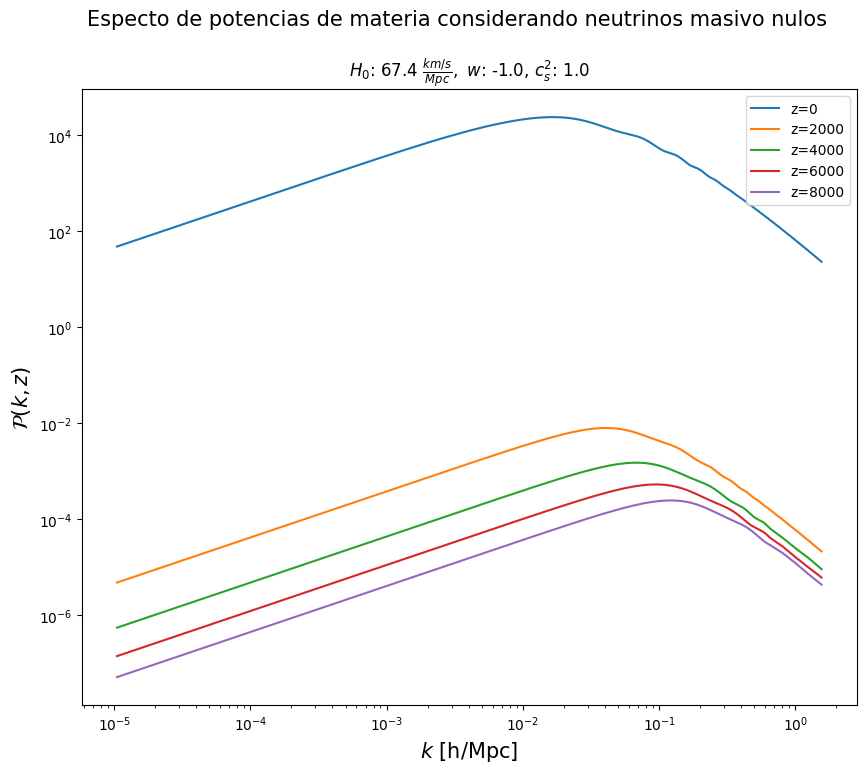

In [25]:
# se hace el plot para distintos redshift
fig, ax = plt.subplots(figsize=(10, 8))

for iz, redshift in enumerate(redshifts):
    ax.loglog(kh1, PK1[iz, :], label=f"z={redshift}")


plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
ax.set_ylabel(r"$\mathcal{P}(k, z)$", fontsize=15)
ax.set_xlabel(r"$k$ [h/Mpc]", fontsize=15)
ax.set_title(f"$H_0$: {pars1.H0} $\\frac{{km/s}}{{Mpc}}, $" + 
                f" $w$: {pars1.DarkEnergy.w}, $c_s^2$: {pars1.DarkEnergy.cs2}")

fig.suptitle("Especto de potencias de materia considerando neutrinos masivo nulos", fontsize=15)

Ahora se hace la comparación para cada redshift:

Text(0.5, 1.0, 'z=0')

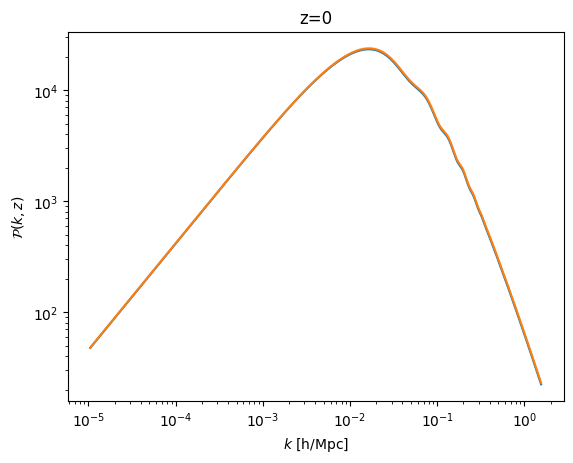

In [26]:
# redshift = 0
plt.loglog(kh, PK[0, :], label = 'Neutrinos masivos')
plt.loglog(kh1, PK1[0, :], label = 'Neutrinos masivos nulos')
plt.xlabel(r'$k$ [h/Mpc]')
plt.ylabel(r"$\mathcal{P}(k, z)$")
plt.title(r'z=0')

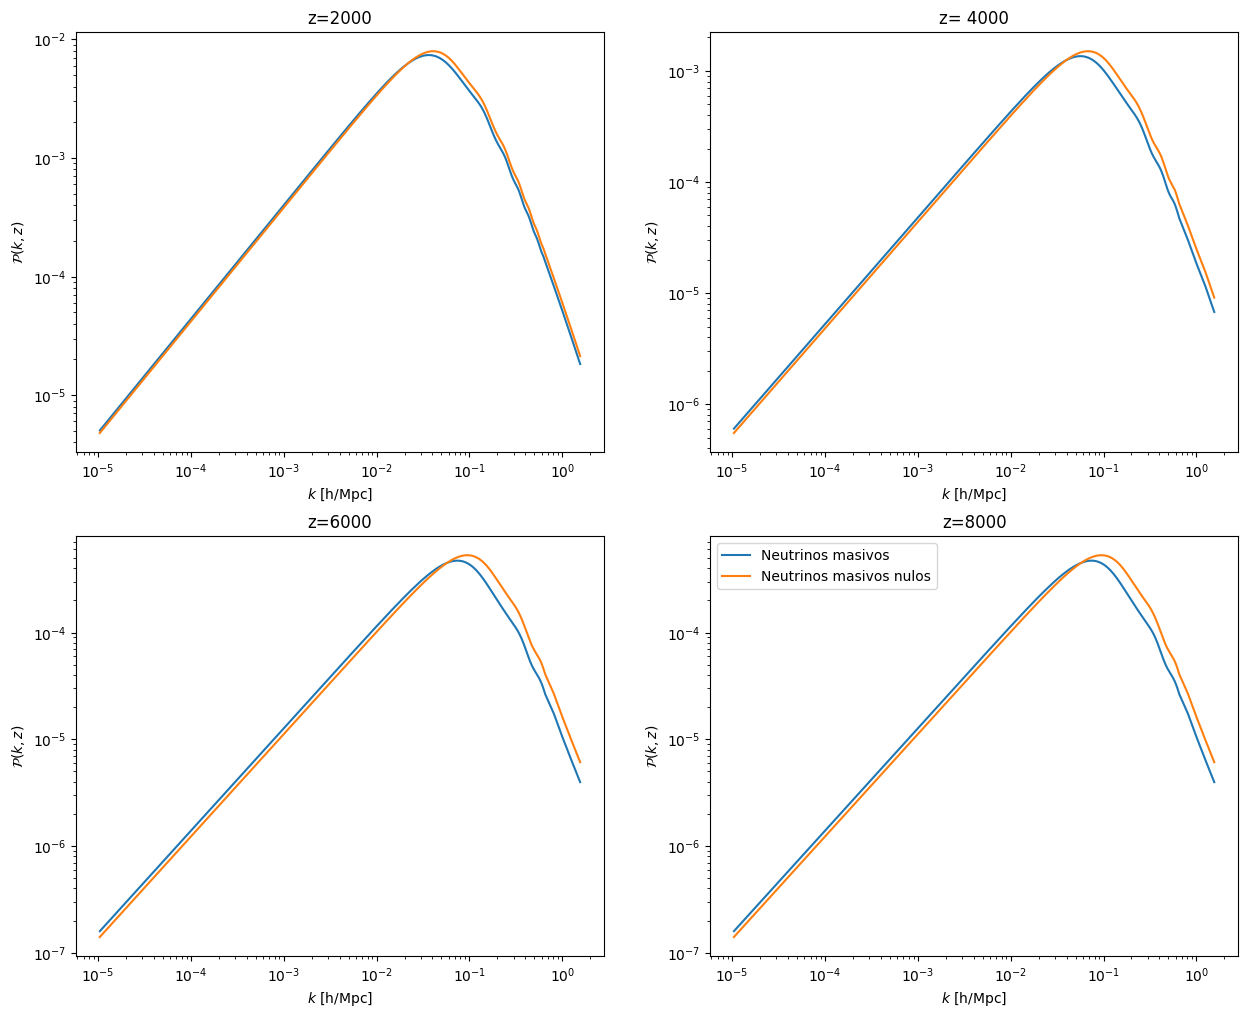

In [27]:
# demás redshift
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

axs[0,0].loglog(kh, PK[1, :], label = 'Neutrinos masivos')
axs[0,0].loglog(kh1, PK1[1, :], label = 'Neutrinos masivos nulos')
axs[0,0].set_title(r'z=' + str(redshifts[1]))

axs[0,1].loglog(kh, PK[2, :], label = 'Neutrinos masivos')
axs[0,1].loglog(kh1, PK1[2, :], label = 'Neutrinos masivos nulos')
axs[0,1].set_title(r'z= ' + str(redshifts[2]))

axs[1,0].loglog(kh, PK[3, :], label = 'Neutrinos masivos')
axs[1,0].loglog(kh1, PK1[3, :], label = 'Neutrinos masivos nulos')
axs[1,0].set_title(r'z=' +  str(redshifts[3]))

axs[1,1].loglog(kh, PK[3, :], label = 'Neutrinos masivos')
axs[1,1].loglog(kh1, PK1[3, :], label = 'Neutrinos masivos nulos')
axs[1,1].set_title(r'z=' +  str(redshifts[4]))

for ax in axs.flat:
    ax.set(xlabel=r"$k$ [h/Mpc]", ylabel=r"$\mathcal{P}(k, z)$")
plt.legend()

Las diferencias se notan a medida que se va aumentando el redshift. Por ejemplo, en $z=4000$ para valores de k apróximadamente menores a $0.1$ (escala $log$) el matter power spectra es mayor al considerar neutrinos masivos. Al pasar $k \sim 0.1$ el peak del power spectra es mayor al no considerar neutrinos y se mantiene esta tendencia hasta $k=1$. Esto se justifica porque los neutrinos masivos se transmiten libremente fuera de las regiones de alta densidad, lo que atenua las perturbaciones en pequeña escala.

## P6

Usando `CAMB` se quiere calcular el espectro de potencia angular ${TT}$. Luego, se quiere explorar diferentes parámetros cosmologicos y comentar la diferencia entre resultados.

In [28]:
# se crean los espectros de potencia para los parámetros de la P5 (caso con neutrinos masivos)
powers = results.get_cmb_power_spectra(pars1, CMB_unit='muK')

Text(0.5, 1.0, 'Angular power spectra')

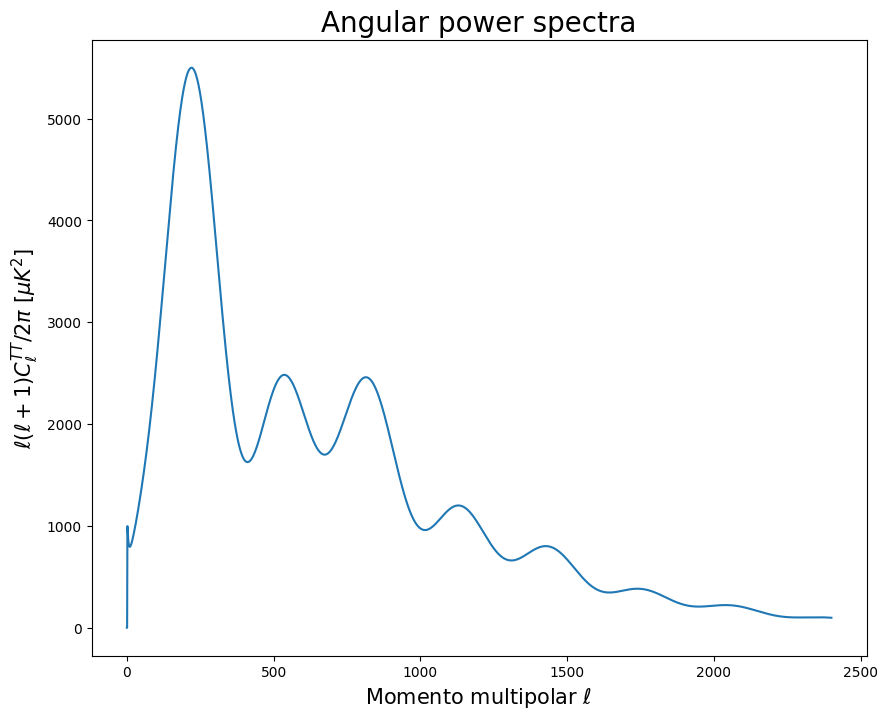

In [29]:
# se extraen los coeficientes Cl y los L
unlesedCL = powers['unlensed_total']
ells = np.arange(unlesedCL[:,1].shape[0])

# se plotea
plt.figure(figsize=(10,8))
plt.plot(ells, unlesedCL[:,0])
plt.ylabel(r'$\ell(\ell+1)C_{\ell}^{TT} / 2\pi$ [$\mu K^2$]', fontsize= 15)
plt.xlabel(r'Momento multipolar $\ell$', fontsize= 15)
plt.title('Angular power spectra', fontsize = 20 )

### Modificación parámetro de densidad de curvatura


In [34]:
# modificación de la densidad de curvatura 

# valores de k
k0 = 0
k1 = 0.03
k2 = 0.07

# se crean distintos modelos variando este parámetro
pars_k0 = camb.set_params(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau, omk=k0 )
pars_k1 = camb.set_params(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau, omk=k1 )
pars_k1_ = camb.set_params(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau, omk=-k1 )
pars_k2 = camb.set_params(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau, omk=k2)
pars_k2_ = camb.set_params(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau, omk=-k2 )

# se crean los espectros de potencia
powers_k0= results.get_cmb_power_spectra(pars_k0, CMB_unit='muK')
powers_k1 = results.get_cmb_power_spectra(pars_k1, CMB_unit='muK')
powers_k1_ = results.get_cmb_power_spectra(pars_k1_, CMB_unit='muK')
powers_k2 = results.get_cmb_power_spectra(pars_k2, CMB_unit='muK')
powers_k2_ = results.get_cmb_power_spectra(pars_k2_, CMB_unit='muK')

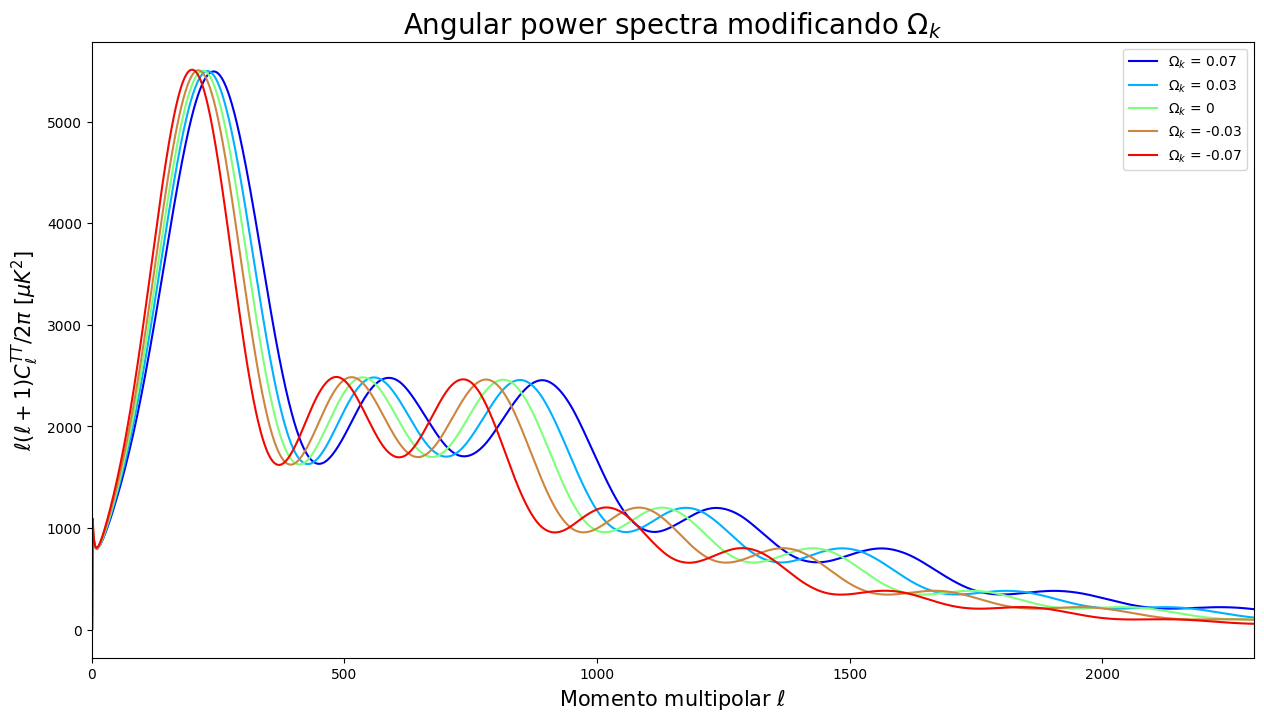

In [73]:
# se extraen los coeficientes Cl
Cl_k0 = powers_k0['unlensed_total']
Cl_k1 = powers_k1['unlensed_total']
Cl_k1_ = powers_k1_['unlensed_total']
Cl_k2 = powers_k2['unlensed_total']
Cl_k2_ = powers_k2_['unlensed_total']

# los l
ls_k0 = np.arange(Cl_k0[:,1].shape[0])
ls_k1 = np.arange(Cl_k1[:,1].shape[0])
ls_k1_ = np.arange(Cl_k1_[:,1].shape[0])
ls_k2 = np.arange(Cl_k2[:,1].shape[0])
ls_k2_ = np.arange(Cl_k2_[:,1].shape[0])

# se plotea
colors = plt.get_cmap('jet')
plt.figure(figsize=(15,8))
plt.plot(ls_k2, Cl_k2[:,0], label = r'$\Omega_k$ = 0.07', color=colors(0.1))
plt.plot(ls_k1, Cl_k1[:,0], label = r'$\Omega_k$ = 0.03', color=colors(0.3))
plt.plot(ls_k0, Cl_k0[:,0], label = r'$\Omega_k$ = 0', color=colors(0.5))
plt.plot(ls_k1_, Cl_k1_[:,0], label = r'$\Omega_k$ = -0.03', color='peru')
plt.plot(ls_k2_, Cl_k2_[:,0], label = r'$\Omega_k$ = -0.07', color=colors(0.9))
plt.ylabel(r'$\ell(\ell+1)C_{\ell}^{TT} / 2\pi$ [$\mu K^2$]', fontsize= 15)
plt.xlabel(r'Momento multipolar $\ell$', fontsize= 15)
plt.xlim(ls_k0[0],2300)
plt.title(r'Angular power spectra modificando $\Omega_k$', fontsize = 20 )
plt.legend()

Al modificar el parámetro de densidad de curvatura, la posición de los peaks varia según el momento multipolar. Por ejemplo, para universos con curvatura abiera (es decir, $\Omega_k > 0$), los peaks se desplazan hacia valores de momento multipolar mayor, o en otras palabras, a una escala angular menor al observar el cielo. Esto se traduce a que el objeto que estemos obversando, se vea más "pequeño". Lo contrario ocurre, al considerar una curvatura cerrada (es decir, $\Omega_k > 0$), pues los peaks se desplazan hacia valores de momento multipolar mayor.

La explicación de este efecto viene dada por la trayectoria de los fotones despúes de la superficie de último Scattering. En el caso de un universo con curvatura abierta, la trayectoria de los fotones "diverge", y esto hace que una escala física fija (como el primer peak), se proyecte en una escala angular menor en comparación a un universo cerrado ($\Omega_k = 0$) y por tanto, a un mayor momento multipolar. Por el contrario, en un universo con curvatura cerrada, la trayectoria de los fotones "converge", produciendo el efecto contrario al mencionado con la curvatura abierta.

### Modificación de parámetro de densidad de bariones y CDM

In [ ]:
# valores para la densidad de bariones
omega_bh2_0 = 0.018
omega_bh2_1 = 0.02
omega_bh2_2 = 0.022
omega_bh2_3 = 0.025
omega_bh2_4 = 0.027

# se crean distintos modelos
pars_bh2_0 = camb.set_params(H0=H0, ombh2=omega_bh2_0, omch2=omega_ch2, tau=tau, omk=k0 )
pars_bh2_1 = camb.set_params(H0=H0, ombh2=omega_bh2_1, omch2=omega_ch2, tau=tau, omk=k0 )
pars_bh2_2 = camb.set_params(H0=H0, ombh2=omega_bh2_2, omch2=omega_ch2, tau=tau, omk=k0 )
pars_bh2_3 = camb.set_params(H0=H0, ombh2=omega_bh2_3, omch2=omega_ch2, tau=tau, omk=k0 )
pars_bh2_4 = camb.set_params(H0=H0, ombh2=omega_bh2_4, omch2=omega_ch2, tau=tau, omk=k0 )

# se crean los espectros de potencia
powers_bh2_0= results.get_cmb_power_spectra(pars_bh2_0, CMB_unit='muK')
powers_bh2_1= results.get_cmb_power_spectra(pars_bh2_1, CMB_unit='muK')
powers_bh2_2= results.get_cmb_power_spectra(pars_bh2_2, CMB_unit='muK')
powers_bh2_3= results.get_cmb_power_spectra(pars_bh2_3, CMB_unit='muK')
powers_bh2_4= results.get_cmb_power_spectra(pars_bh2_4, CMB_unit='muK')

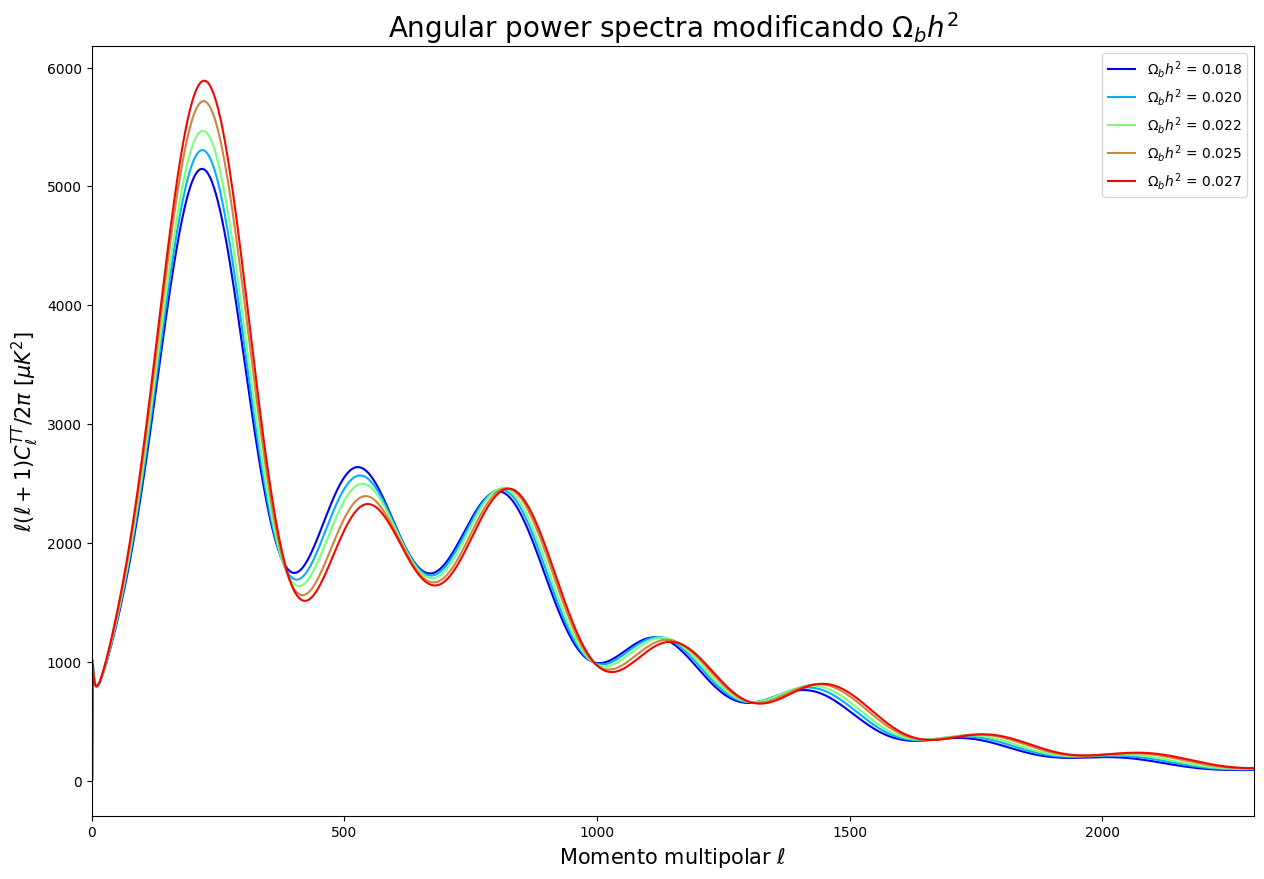

In [72]:
# se extraen los coeficientes Cl
Cl_bh2_0 = powers_bh2_0['unlensed_total']
Cl_bh2_1 = powers_bh2_1['unlensed_total']
Cl_bh2_2 = powers_bh2_2['unlensed_total']
Cl_bh2_3 = powers_bh2_3['unlensed_total']
Cl_bh2_4 = powers_bh2_4['unlensed_total']

# los l
ls_bh2_0 = np.arange(Cl_bh2_0[:,1].shape[0])
ls_bh2_1 = np.arange(Cl_bh2_1[:,1].shape[0])
ls_bh2_2 = np.arange(Cl_bh2_2[:,1].shape[0])
ls_bh2_3 = np.arange(Cl_bh2_3[:,1].shape[0])
ls_bh2_4 = np.arange(Cl_bh2_4[:,1].shape[0])

# se plotea
colors = plt.get_cmap('jet')
plt.figure(figsize=(15,10))
plt.plot(ls_bh2_0, Cl_bh2_0[:,0], label = r'$\Omega_bh^2$ = 0.018', color=colors(0.1))
plt.plot(ls_bh2_1, Cl_bh2_1[:,0], label = r'$\Omega_bh^2$ = 0.020',color=colors(0.3))
plt.plot(ls_bh2_2, Cl_bh2_2[:,0],  label = r'$\Omega_bh^2$ = 0.022', color=colors(0.5))
plt.plot(ls_bh2_3, Cl_bh2_3[:,0],  label = r'$\Omega_bh^2$ = 0.025', color='peru')
plt.plot(ls_bh2_4, Cl_bh2_4[:,0], label = r'$\Omega_bh^2$ = 0.027', color=colors(0.9))
plt.ylabel(r'$\ell(\ell+1)C_{\ell}^{TT} / 2\pi$ [$\mu K^2$]', fontsize= 15)
plt.xlabel(r'Momento multipolar $\ell$', fontsize= 15)
plt.xlim(ls_k0[0],2300)
plt.title(r'Angular power spectra modificando $\Omega_bh^2$', fontsize = 20 )
plt.legend()

In [75]:
# valores para la densidad CDM 
omega_ch2_0 = 0.095
omega_ch2_1 = 0.107
omega_ch2_2 = 0.119
omega_ch2_3 = 0.131
omega_ch2_4 = 0.143

# se crean distintos modelos
pars_ch2_0 = camb.set_params(H0=H0, ombh2=omega_bh2, omch2=omega_ch2_0, tau=tau, omk=k0 )
pars_ch2_1 = camb.set_params(H0=H0, ombh2=omega_bh2, omch2=omega_ch2_1, tau=tau, omk=k0 )
pars_ch2_2 = camb.set_params(H0=H0, ombh2=omega_bh2, omch2=omega_ch2_2, tau=tau, omk=k0 )
pars_ch2_3 = camb.set_params(H0=H0, ombh2=omega_bh2, omch2=omega_ch2_3, tau=tau, omk=k0 )
pars_ch2_4 = camb.set_params(H0=H0, ombh2=omega_bh2, omch2=omega_ch2_4, tau=tau, omk=k0 )

# se crean los espectros de potencia
powers_ch2_0= results.get_cmb_power_spectra(pars_ch2_0, CMB_unit='muK')
powers_ch2_1= results.get_cmb_power_spectra(pars_ch2_1, CMB_unit='muK')
powers_ch2_2= results.get_cmb_power_spectra(pars_ch2_2, CMB_unit='muK')
powers_ch2_3= results.get_cmb_power_spectra(pars_ch2_3, CMB_unit='muK')
powers_ch2_4= results.get_cmb_power_spectra(pars_ch2_4, CMB_unit='muK')

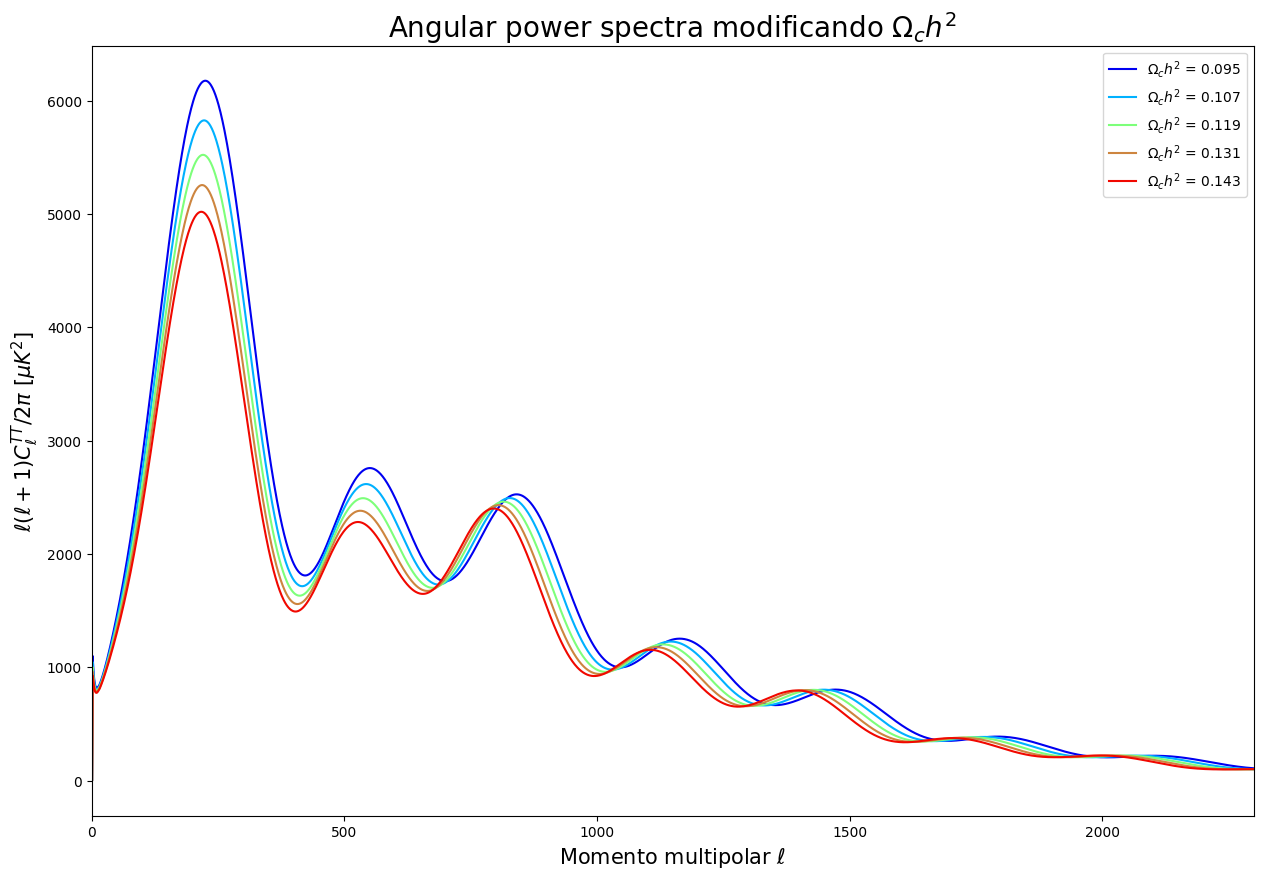

In [76]:
# se extraen los coeficientes Cl
Cl_ch2_0 = powers_ch2_0['unlensed_total']
Cl_ch2_1 = powers_ch2_1['unlensed_total']
Cl_ch2_2 = powers_ch2_2['unlensed_total']
Cl_ch2_3 = powers_ch2_3['unlensed_total']
Cl_ch2_4 = powers_ch2_4['unlensed_total']

# los l
ls_ch2_0 = np.arange(Cl_ch2_0[:,1].shape[0])
ls_ch2_1 = np.arange(Cl_ch2_1[:,1].shape[0])
ls_ch2_2 = np.arange(Cl_ch2_2[:,1].shape[0])
ls_ch2_3 = np.arange(Cl_ch2_3[:,1].shape[0])
ls_ch2_4 = np.arange(Cl_ch2_4[:,1].shape[0])

# se plotea
colors = plt.get_cmap('jet')
plt.figure(figsize=(15,10))
plt.plot(ls_ch2_0, Cl_ch2_0[:,0], label = r'$\Omega_ch^2$ = 0.095', color=colors(0.1))
plt.plot(ls_ch2_1, Cl_ch2_1[:,0], label = r'$\Omega_ch^2$ = 0.107',color=colors(0.3))
plt.plot(ls_ch2_2, Cl_ch2_2[:,0],  label = r'$\Omega_ch^2$ = 0.119', color=colors(0.5))
plt.plot(ls_ch2_3, Cl_ch2_3[:,0],  label = r'$\Omega_ch^2$ = 0.131', color='peru')
plt.plot(ls_ch2_4, Cl_ch2_4[:,0], label = r'$\Omega_ch^2$ = 0.143', color=colors(0.9))
plt.ylabel(r'$\ell(\ell+1)C_{\ell}^{TT} / 2\pi$ [$\mu K^2$]', fontsize= 15)
plt.xlabel(r'Momento multipolar $\ell$', fontsize= 15)
plt.xlim(ls_k0[0],2300)
plt.title(r'Angular power spectra modificando $\Omega_ch^2$', fontsize = 20 )
plt.legend()

En ambos gráficos se observa un aumento en la amplitud de los peaks. A medida que aumento el momento multipolar, los peaks son desplazados similarmente a lo ocurrido al variar el párameto de densidad de curvatura.